In [1]:
library(readr, quietly = TRUE, warn.conflicts = FALSE)
library(Seurat, quietly = TRUE, warn.conflicts = FALSE)
library(SingleCellExperiment, quietly = TRUE, warn.conflicts = FALSE)
library(gam)

Attaching SeuratObject

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode

Warning message:
“package ‘matrixStats’ was built under R version 4.3.3”

Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExp

In [2]:
vedo=read_rds('../data/xenopus_combined_and_clustered_no_out.rds')
df = read_rds('../data/generated data from script/df.rds')
vedo = UpdateSeuratObject(object = vedo)
subset_data <- subset(vedo, idents = 9)

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc ‘pca’

Updating matrix keys for DimReduc ‘umap’

Updating matrix keys for DimReduc ‘tsne’

Warning message:
“DimReduc pca changing from DimReduc to DimReduc”
Warning message:
“DimReduc umap changing from DimReduc to DimReduc”
Warning message:
“DimReduc tsne changing from DimReduc to DimReduc”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in integrated

Updating slots in pca

Updating slots in umap

Setting umap DimReduc to global

Updating slots in tsne

Setting tsne DimReduc to global

No assay information could be found for FindIntegrationAnchors

Warning message:
“Adding a command log without an assay associated with it”
No assay information could be found for PairwiseIntegrateReference

Warning message:
“Adding a command log without an assay associated with it”
Sett

In [3]:
# 对该 cluster 单独进行标准化和降噪
subset_data <- SCTransform(subset_data,  variable.features.n = 3000) # SCTransform：适合在小数据集或高噪声情况下使用，结果通常更可靠。 对于目标 cluster 较小的情况 (如占比 4%)，SCTransform 更适合，尤其是它能更好地处理技术噪声。

HVGs <- as.data.frame(as.matrix(subset_data@assays$SCT@counts))
HVGs_name <- subset_data@assays$SCT@var.features
HVGs <- HVGs[HVGs_name,]
HVGs 

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 15489 by 134

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 134 cells



  |======================================================================| 100%


Found 63 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 15489 genes



  |======================================================================| 100%


Computing corrected count matrix for 15489 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 5.709366 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



,AATAGAGGTCAGGAGT.1,AGAGAATGTCTCGCGA.1,ATGACCACACATTCTT.1,ATGGGAGAGAACTTCC.1,CCACCATTCAGTCTTT.1,CCGGGTAAGTTCCGTA.1,CCTTGTGAGTTGGACG.1,CGTTGGGGTACGTGAG.1,CTCCAACCACCTAAAC.1,CTGCAGGAGGAGTATT.1,⋯,CAGTTCCCATACGCAT.1,CCCTCAAAGCGTATGG.1,CGAGGCTCAAAGCACG.1,CTCCCTCCATGAGATA.1,CTGCCATTCAGCACCG.1,GCGTGCACAATATCCG.1,TCGCACTGTTAAACAG.1,TGCAGATCACGTAGTT.1,TGCGGGTTCATGGATC.1,TTACGTTCATGGCTGC.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
eif4a1.S,68,80,74,63,50,76,116,70,138,42,⋯,16,71,52,44,33,69,79,30,32,80
krt.S,249,231,324,259,285,221,322,433,266,477,⋯,60,149,94,248,122,298,58,92,186,95
foxi1.S,84,46,25,37,97,96,103,146,87,106,⋯,3,5,2,5,1,3,7,2,13,11
eif4a1.L,65,85,59,63,62,59,77,74,81,41,⋯,48,74,44,84,74,85,94,45,75,83
Xelaev18000774m.g,133,135,221,96,99,103,114,131,198,159,⋯,42,61,24,41,30,120,25,54,62,58
gata2.L,56,31,67,58,87,41,29,59,68,46,⋯,2,66,3,98,61,79,20,3,56,44
foxi1.L,87,83,82,58,99,78,102,193,113,143,⋯,4,11,7,14,8,7,33,5,39,10
Xelaev18038704m.g,4,31,2,4,1,2,43,2,0,3,⋯,2,5,4,2,5,2,1,6,3,1
krt12.S,47,84,104,71,69,28,107,190,20,148,⋯,4,4,10,4,10,17,4,8,9,9


In [4]:
selected_genes = list()
for (a in 1:nrow(HVGs)) {
  count = 0
  for (b in 1:ncol(HVGs)){
    if (HVGs[a,b]>0){
      count = count + 1
    }
  }
  if (count > 10 ){
    selected_genes<-append(selected_genes,rownames(HVGs[a,]))
  }
}

# generate the background data for GO analysis
print(length(selected_genes))
selected_genes<-unlist(selected_genes)

  [1] "AATAGAGGTCAGGAGT.1" "AGAGAATGTCTCGCGA.1" "ATGACCACACATTCTT.1"
  [4] "ATGGGAGAGAACTTCC.1" "CCACCATTCAGTCTTT.1" "CCGGGTAAGTTCCGTA.1"
  [7] "CCTTGTGAGTTGGACG.1" "CGTTGGGGTACGTGAG.1" "CTCCAACCACCTAAAC.1"
 [10] "CTGCAGGAGGAGTATT.1" "GATGAGGAGCTGAGCA.1" "GCATTAGTCTCGTTTA.1"
 [13] "GCCAGCATCCGCCTAT.1" "GCTTCACAGAAGGCTC.1" "GGTTAACTCCGACGGT.1"
 [16] "GTCGAATAGGCGCTTC.1" "GTGACGCTCGCTAAAC.1" "GTGGCGTCACTAACCA.1"
 [19] "GTTTGGAGTCTGGTTA.1" "TACCTCGTCTCGGTAA.1" "TCCACGTAGAGACAAG.1"
 [22] "TCCGTGTCATATAGCC.1" "TCCTCCCGTTGGGAAC.1" "TTCACGCGTCTGCGCA.1"
 [25] "TTCAGGACAACAAAGT.1" "TTCGATTGTACAAGTA.1" "TTCGCTGAGGTGAGCT.1"
 [28] "AGTAACCAGCCAAGTG.1" "CAGCGTGCAAATGAGT.1" "GCTGGGTTCCCTCTTT.1"
 [31] "TAACGACAGCGTCAAG.1" "AACCCAACATGGAGAC.1" "AAGATAGTCTGCCTCA.1"
 [34] "AAGCGAGCAAGCTGCC.1" "AAGGTAAAGTCGGGAT.1" "ACCTGAATCTTTCAGT.1"
 [37] "ACGGTTAAGATGAACT.1" "ACTGATGAGTTCGGTT.1" "ACTTCCGAGTTGTAAG.1"
 [40] "AGAAGTAAGTACGTCT.1" "AGACAGGTCGTTGTTT.1" "AGACCCGAGCACACCC.1"
 [43] "AGATAGACATGATCTG.1" "AGATCC

In [5]:
HVGs<- HVGs[selected_genes,]
HVGs

,AATAGAGGTCAGGAGT.1,AGAGAATGTCTCGCGA.1,ATGACCACACATTCTT.1,ATGGGAGAGAACTTCC.1,CCACCATTCAGTCTTT.1,CCGGGTAAGTTCCGTA.1,CCTTGTGAGTTGGACG.1,CGTTGGGGTACGTGAG.1,CTCCAACCACCTAAAC.1,CTGCAGGAGGAGTATT.1,⋯,CAGTTCCCATACGCAT.1,CCCTCAAAGCGTATGG.1,CGAGGCTCAAAGCACG.1,CTCCCTCCATGAGATA.1,CTGCCATTCAGCACCG.1,GCGTGCACAATATCCG.1,TCGCACTGTTAAACAG.1,TGCAGATCACGTAGTT.1,TGCGGGTTCATGGATC.1,TTACGTTCATGGCTGC.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
eif4a1.S,68,80,74,63,50,76,116,70,138,42,⋯,16,71,52,44,33,69,79,30,32,80
krt.S,249,231,324,259,285,221,322,433,266,477,⋯,60,149,94,248,122,298,58,92,186,95
foxi1.S,84,46,25,37,97,96,103,146,87,106,⋯,3,5,2,5,1,3,7,2,13,11
eif4a1.L,65,85,59,63,62,59,77,74,81,41,⋯,48,74,44,84,74,85,94,45,75,83
Xelaev18000774m.g,133,135,221,96,99,103,114,131,198,159,⋯,42,61,24,41,30,120,25,54,62,58
gata2.L,56,31,67,58,87,41,29,59,68,46,⋯,2,66,3,98,61,79,20,3,56,44
foxi1.L,87,83,82,58,99,78,102,193,113,143,⋯,4,11,7,14,8,7,33,5,39,10
Xelaev18038704m.g,4,31,2,4,1,2,43,2,0,3,⋯,2,5,4,2,5,2,1,6,3,1
krt12.S,47,84,104,71,69,28,107,190,20,148,⋯,4,4,10,4,10,17,4,8,9,9


In [6]:
sce<-SingleCellExperiment(assays = list(counts = as.matrix(HVGs)))
sce$Pseudotime <- df$dptval
sce

Y <- counts(sce)
t <- sce$Pseudotime

#Run GAM with LOESS function for all the genes
gam.res <- apply(Y, 1, function(z){
    d <- data.frame(z=z, t=t)
    tmp <- gam(z ~ lo(t), data=d)
    p <- summary(tmp)[4][[1]][1,5]  #p-value
    f<-fitted(tmp)
    c(p,f)
})


class: SingleCellExperiment 
dim: 2601 134 
metadata(0):
assays(1): counts
rownames(2601): eif4a1.S krt.S ... zfp36l1.S slc25a28.S
rowData names(0):
colnames(134): AATAGAGGTCAGGAGT.1 AGAGAATGTCTCGCGA.1 ...
  TGCGGGTTCATGGATC.1 TTACGTTCATGGCTGC.1
colData names(1): Pseudotime
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [7]:
#Build the table of the genes p-values
genes.table<-data.frame(genes.names=rownames(HVGs))
genes.table$pvals<-gam.res[1,]
genes.table$FDR<-p.adjust(genes.table$pvals, method="fdr") #Adjust p-values
genes.table<-genes.table[order(genes.table$FDR),] #Order the genes according to the FDR
genes.table$genes.names <- as.character(genes.table$genes.names)
results.gam.tot<-genes.table[genes.table$FDR < 0.01,][c('genes.names','FDR')] #Filter the significant genes

#Save the matrix of fitted values
gam.fitted<-gam.res[-1,]

print(paste("We have"
           ,sum(genes.table$FDR < 0.01)
           ,"significant genes"))

[1] "We have 1206 significant genes"


# Hierarchical clustering 

In [8]:
#Robustness analysis: change the number X of the high_varX_df to compute the robustness curve for a cluster

library(dynamicTreeCut, quietly = TRUE, warn.conflicts = FALSE)
library(WGCNA, quietly = TRUE, warn.conflicts = FALSE)
library(Rtsne, quietly = TRUE, warn.conflicts = FALSE)
library(mcclust, quietly = TRUE, warn.conflicts = FALSE)
DE_genes_df <- HVGs[results.gam.tot$genes.names,]


data<-t(as.matrix(DE_genes_df))

Warning message:
“package ‘WGCNA’ was built under R version 4.3.3”

Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust




Warning message:
“package ‘lpSolve’ was built under R version 4.3.3”


## Robustness analysis

### robustness analysis

In [9]:
# nr of random samples
nrRepeats = 50
# percent of cells to keep
percent = 70
# nr of cells left
sampleSize <- round(length(rownames(data))*percent/100)

myRandSample <- function(indexVector){
        idxMatrix <- matrix(rep(NA, sampleSize*nrRepeats)
                            ,nrow = nrRepeats)
        for (i in 1:nrow(idxMatrix)){
                mySample <- sample(indexVector
                                   ,size = sampleSize)
                idxMatrix[i,] <- mySample
        }
        idxMatrix
}

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’



 ..cutHeight not given, setting it to 0.789  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.793  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.784  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.791  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.791  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.786  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.786  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.791  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.789  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to

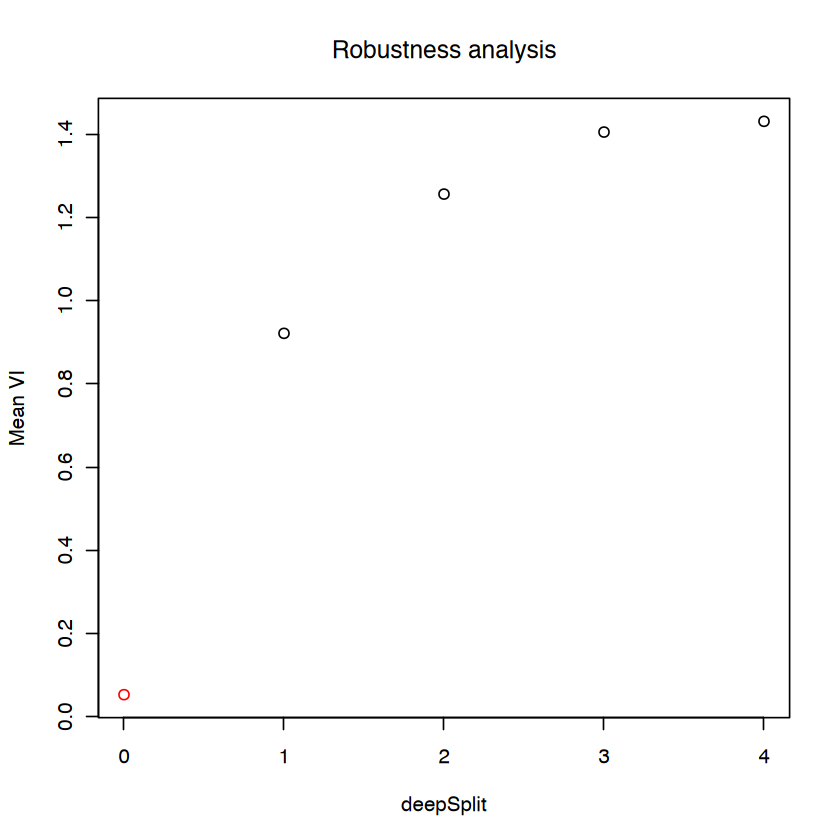

In [10]:
# indices of all the cells
cellidx <- rownames(data)
RandIdxMatrix <- myRandSample(cellidx)

# function to calculate clusters
calculateClusters <- function(geneIndices,deepSplit){
    cor.mat<-cor(data[geneIndices,],method="spearman")
    dissim<-sqrt((1-cor.mat)/2)
    dist.mat<-as.dist(dissim)
    test.clust<-hclust(dist.mat, method="average")
    clust<-cutreeDynamic(test.clust,distM=as.matrix(dist.mat), minClusterSize=50, method="hybrid", deepSplit =deepSplit)
    
    clust
}

VarInfoVector <- matrix(rep(NA, nrRepeats * 5),ncol = 5)
colnames(VarInfoVector) <- c(0,1,2,3,4)

for(j in 0:4){
    tot.clust <- calculateClusters(cellidx,j)
    for (i in 1:nrow(RandIdxMatrix)){
        # take indices of HVGs from the RandIdxMatrix of the i-th iteration
        indices <- RandIdxMatrix[i,]
        # calculate the cluster statistics with these indices and deepSplit == j
        subsample.clust <- calculateClusters(indices,j)
        if(length(duplicated(indices)[duplicated(indices) == TRUE])>0){print(ERROR)}
        #Calculate the variation of information between the two clustering (whole dataset and subsampled data)
        VarInfoVector[i,j+1] <- vi.dist(tot.clust,subsample.clust)
    }
}

plot(c(0,1,2,3,4),c(mean(VarInfoVector[,1]), mean(VarInfoVector[,2]), mean(VarInfoVector[,3]), mean(VarInfoVector[,4]),
                   mean(VarInfoVector[,5])), col = c('red', 'black', 'black', 'black', 'black'), xlab="deepSplit", ylab="Mean VI") 
title(main = "Robustness analysis")

choose 0 for the deepsplit. When we set the deepsplit as 0, we would get 2 clusters in my case. Therefore, I choose boostrap to further varify the clusters.

### Bootstrapping

In [11]:
library(fpc)

boostrapfinalClus <- function(df) {
  data <- as.matrix(df)
  gene_names <- rownames(df)
  if (is.null(gene_names)) {
    gene_names <- paste0("Gene", 1:nrow(df)) # Create generic names if none exist
    rownames(data) <- gene_names
  }
  
  cor.mat <- cor(data, method = "spearman")
  dissim <- sqrt((1 - cor.mat) / 2)
  dist.mat <- as.dist(dissim)
  
  cboot.hclust <- clusterboot(dist.mat, distances = TRUE, clustermethod = hclustCBI, method = "average", k = 2)
  
  # 提取关键信息
  jaccard_mean <- cboot.hclust$bootmean
  n_boot <- cboot.hclust$B # num of resampling
  
  # 正確提取 dissolved 和 recovered
  dissolved <- cboot.hclust$bootbrd
  recovered <- cboot.hclust$bootrecover
  
  # 處理 cluster_sizes 可能為空的狀況
  if (length(table(cboot.hclust$result$partition)) == 0) {
    cluster_sizes <- c(0,0)
  } else {
    cluster_sizes <- table(cboot.hclust$result$partition)
  }
  
  # 取得原始資料的基因順序和名稱
  original_gene_order <- names(cboot.hclust$result$partition)
  
  # 建立包含每個基因 cluster 分配結果的 data frame，並使用原始基因順序
  gene_cluster_df <- data.frame(Gene = original_gene_order, Cluster = cboot.hclust$result$partition)
  
  # 建立包含所有可能 Cluster 的 data frame 骨架
  results_df <- data.frame(Cluster = 1:2)
  
  # 將 cluster_sizes 轉換為 data frame 並合併
  cluster_sizes_df <- data.frame(Cluster = as.numeric(names(cluster_sizes)), Size = as.vector(cluster_sizes))
  results_df <- merge(results_df, cluster_sizes_df, by = "Cluster", all.x = TRUE)
  results_df$Size[is.na(results_df$Size)] <- 0 # 將沒有對應 Cluster size 的設為 0
  
  # 添加 Jaccard, Dissolved, Recovered
  results_df$Jaccard_Mean <- jaccard_mean
  results_df$Dissolved <- dissolved
  results_df$Recovered <- recovered
  results_df$Cluster_Name <- paste0("Cluster ", results_df$Cluster)
  
  return(list(results_df = results_df, gene_cluster_df = gene_cluster_df, n_boot = n_boot))
}

# 示例用法
results <- boostrapfinalClus(data)
results_df <- results$results_df
n_boot <- results$n_boot

# 打印结果
cat(paste("Bootstrapping Results (", n_boot, "runs):\n", sep = ""))
print(results_df)
cat("\nJaccard Mean: The average Jaccard index across all bootstrap runs. Higher values indicate greater cluster stability.\n")
cat("Dissolved: The number of times a cluster was not found in a bootstrapped dataset.\n")
cat("Recovered: The number of times a cluster was fully recovered in a bootstrapped dataset.\n")

Warning message:
“package ‘fpc’ was built under R version 4.3.3”


boot 1 
boot 2 
boot 3 
boot 4 
boot 5 
boot 6 
boot 7 
boot 8 
boot 9 
boot 10 
boot 11 
boot 12 
boot 13 
boot 14 
boot 15 
boot 16 
boot 17 
boot 18 
boot 19 
boot 20 
boot 21 
boot 22 
boot 23 
boot 24 
boot 25 
boot 26 
boot 27 
boot 28 
boot 29 
boot 30 
boot 31 
boot 32 
boot 33 
boot 34 
boot 35 
boot 36 
boot 37 
boot 38 
boot 39 
boot 40 
boot 41 
boot 42 
boot 43 
boot 44 
boot 45 
boot 46 
boot 47 
boot 48 
boot 49 
boot 50 
boot 51 
boot 52 
boot 53 
boot 54 
boot 55 
boot 56 
boot 57 
boot 58 
boot 59 
boot 60 
boot 61 
boot 62 
boot 63 
boot 64 
boot 65 
boot 66 
boot 67 
boot 68 
boot 69 
boot 70 
boot 71 
boot 72 
boot 73 
boot 74 
boot 75 
boot 76 
boot 77 
boot 78 
boot 79 
boot 80 
boot 81 
boot 82 
boot 83 
boot 84 
boot 85 
boot 86 
boot 87 
boot 88 
boot 89 
boot 90 
boot 91 
boot 92 
boot 93 
boot 94 
boot 95 
boot 96 
boot 97 
boot 98 
boot 99 
boot 100 
Bootstrapping Results (100runs):
  Cluster Size Jaccard_Mean Dissolved Recovered Cluster_Name
1       1  427

## plot result

choose 0 for the deepsplit

library(dynamicTreeCut, quietly = TRUE, warn.conflicts = FALSE)
library(WGCNA, quietly = TRUE, warn.conflicts = FALSE)
library(Rtsne, quietly = TRUE, warn.conflicts = FALSE)
library(mcclust, quietly = TRUE, warn.conflicts = FALSE)

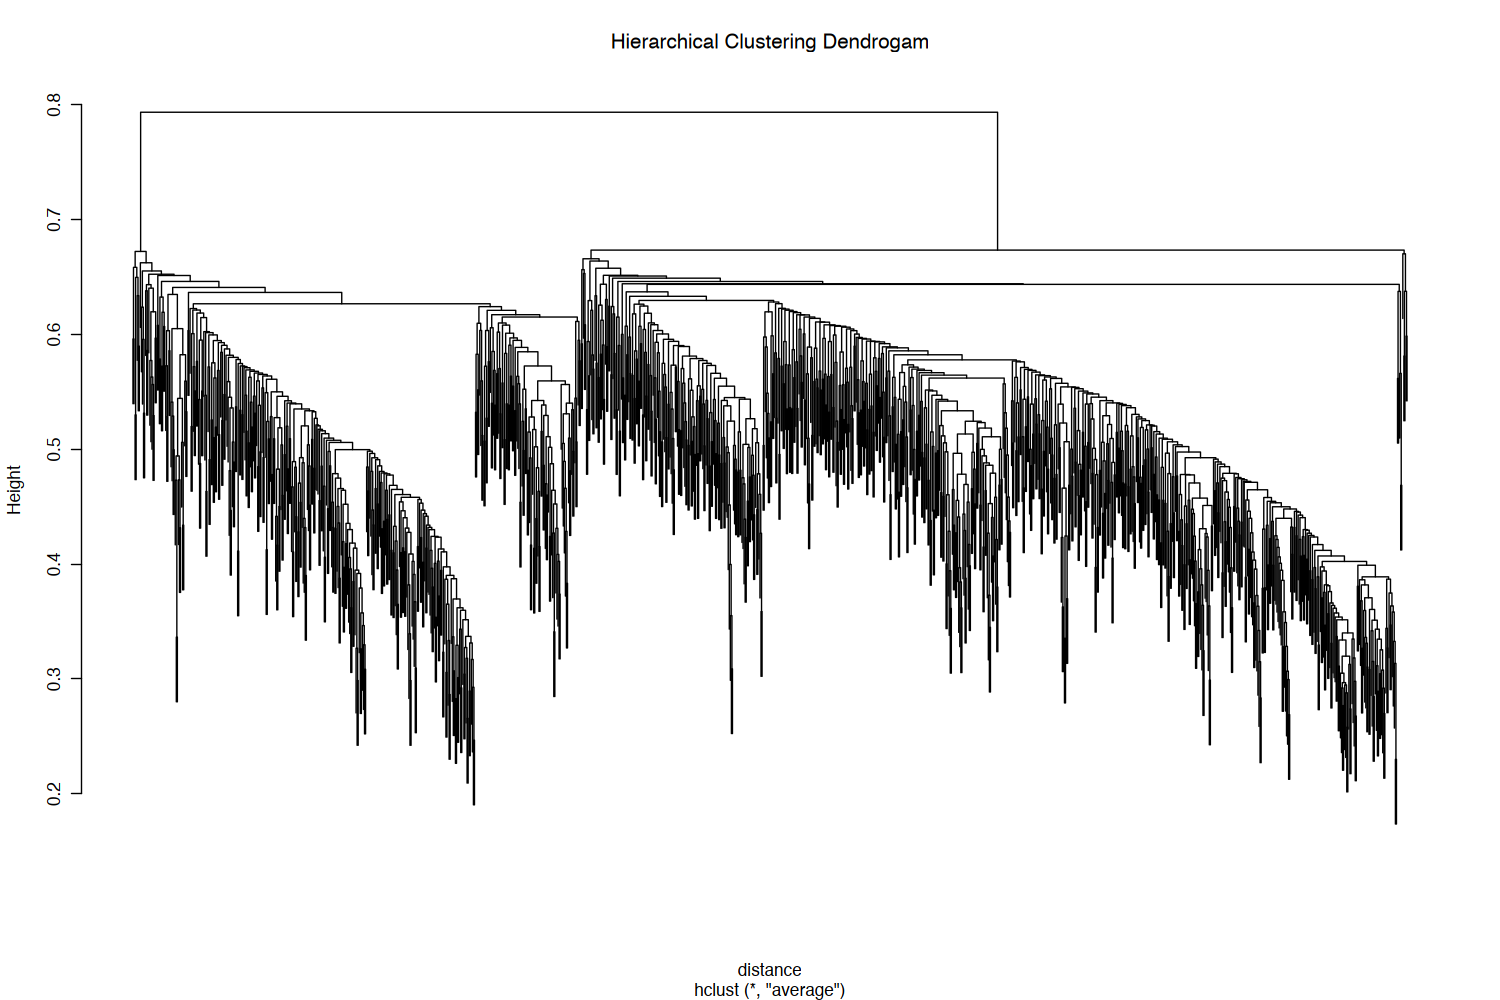

In [12]:
plotfinalClus <- function(df){
    data<-as.matrix(df)
    cor.mat<-cor(data,method="spearman")
    dissim<-sqrt((1-cor.mat)/2)
    dist.mat<-as.dist(dissim)
    test.clust<-hclust(dist.mat, method="average")

    plot(test.clust, xlab = "distance", main =  "Hierarchical Clustering Dendrogam", cex = 0.3)
}
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 100)
plotfinalClus(data)



# compare the cluster result from Bootstrapping and Robustness Analysis 

In [13]:
finalClus <- function(df,deepSplit){
    data<-as.matrix(df)
    cor.mat<-cor(data,method="spearman")
    dissim<-sqrt((1-cor.mat)/2)
    dist.mat<-as.dist(dissim)
    test.clust<-hclust(dist.mat, method="average")
    clust<-cutreeDynamic(test.clust,distM=as.matrix(dist.mat), minClusterSize=50,
                         method="hybrid", deepSplit =deepSplit)
    clust
}  

clust<-finalClus(data,0)
length(clust)
names(clust) <- colnames(data) # 加上基因名稱

robustness_clust_df <- data.frame(Gene = names(clust), Cluster = clust)
rownames(robustness_clust_df) <- NULL # 移除 rownames

bootstrap_clust_df <- results$gene_cluster_df
rownames(bootstrap_clust_df) <- NULL # 移除 rownames
# 排序兩個 data frame，確保基因順序一致 (非常重要!)
robustness_clust_df <- robustness_clust_df[order(robustness_clust_df$Gene), ]
bootstrap_clust_df <- bootstrap_clust_df[order(bootstrap_clust_df$Gene), ]

 ..cutHeight not given, setting it to 0.789  ===>  99% of the (truncated) height range in dendro.
 ..done.


[1] 1206

In [18]:
# 获取唯一的 Cluster 值
robustness_clusters <- unique(robustness_clust_df$Cluster)
bootstrap_clusters <- unique(bootstrap_clust_df$Cluster)

# 初始化映射表
cluster_mapping <- list()

# 遍历 robustness 的每个 Cluster，找到与 bootstrap 最匹配的 Cluster
for (robust_cluster in robustness_clusters) {
  best_jaccard <- 0
  best_bootstrap_cluster <- NA
  
  for (boot_cluster in bootstrap_clusters) {
    # 获取每个 Cluster 的基因索引
    robust_indices <- which(robustness_clust_df$Cluster == robust_cluster)
    bootstrap_indices <- which(bootstrap_clust_df$Cluster == boot_cluster)
    
    # 计算 Jaccard 指数
    jaccard <- length(intersect(robust_indices, bootstrap_indices)) / 
      length(union(robust_indices, bootstrap_indices))
    
    # 如果 Jaccard 指数更高，则更新最佳配对
    if (jaccard > best_jaccard) {
      best_jaccard <- jaccard
      best_bootstrap_cluster <- boot_cluster
    }
  }
  
  # 保存最佳配对结果
  cluster_mapping[[as.character(robust_cluster)]] <- best_bootstrap_cluster
}

# 打印映射关系
cat("Cluster mapping:\n")
print(cluster_mapping)

# 创建反向映射表，将 bootstrap 的 Cluster 转换为 robustness 的 Cluster
reverse_mapping <- setNames(
  names(cluster_mapping), 
  unlist(cluster_mapping, use.names = FALSE)
)

# 转换 bootstrap_clust_df 的 Cluster 编号
bootstrap_clust_df$MappedCluster <- sapply(
  bootstrap_clust_df$Cluster, 
  function(x) as.integer(reverse_mapping[as.character(x)])
)

cat(paste("Jaccard Index:", best_jaccard, "\n"))

# 检查两个 Cluster 的一致性
cat("\nChecking cluster consistency...\n")
if (all(robustness_clust_df$Cluster == bootstrap_clust_df$MappedCluster)) {
  cat("Clusters are consistent after mapping.\n")
} else {
  # 找出不一致的基因
  inconsistent_genes <- robustness_clust_df$Gene[robustness_clust_df$Cluster != bootstrap_clust_df$MappedCluster]
  cat("Different clustering Genes:\n")
  print(inconsistent_genes)
}


Cluster mapping:
$`1`
[1] 2

$`2`
[1] 1

Jaccard Index: 0.992974238875878 

Checking cluster consistency...
Different clustering Genes:
[1] "cited4.L"          "slc16a3.L"         "Xelaev18001645m.g"


# save file

In [19]:
write.table(selected_genes, file = "../data/generated data from script/background_for_GO.txt", sep = "\t",
            row.names = FALSE, quote = FALSE)
output_filename <- "../data/generated data from script/robustness_clustering.rds" # 設定輸出檔案名稱
saveRDS(robustness_clust_df, file = output_filename)

cat(paste("Clustering results saved to:", output_filename, "\n"))

output_filename <- "../data/generated data from script/bootstrap_clustering.rds" # 設定輸出檔案名稱
saveRDS(bootstrap_clust_df, file = output_filename)

cat(paste("Clustering results saved to:", output_filename, "\n"))

saveRDS(data, file = "../data/generated data from script/data.rds")

Clustering results saved to: ../data/generated data from script/robustness_clustering.rds 
Clustering results saved to: ../data/generated data from script/bootstrap_clustering.rds 


In [20]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-apple-darwin20 (64-bit)
Running under: macOS Monterey 12.7.6

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-x86_64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-x86_64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: Europe/Berlin
tzcode source: internal

attached base packages:
[1] splines   stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] fpc_2.2-13                  mcclust_1.0.1              
 [3] lpSolve_5.6.23              Rtsne_0.17                 
 [5] WGCNA_1.73                  fastcluster_1.2.6          
 [7] dynamicTreeCut_1.63-1       gam_1.22-5                 
 [9] foreach_1.5.2               SingleCellExperiment_1.24.0
[11] SummarizedExperiment_1.32.0 Biobase_2.62.0             
[13] GenomicRanges_1